<a href="https://colab.research.google.com/github/zakilbaki/ml-2025/blob/main/Projects/Cars_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

IMPORTING THE DATASET

In [ ]:
import pandas as pd

column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                "acceleration", "model_year", "origin", "car_name"]

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

data= pd.read_csv(url, names=column_names, na_values="?", comment='\t',
                 sep=' ', skipinitialspace=True)

data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


# Let's Take a look at the data structure

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


# Mpg is the target Value
# Displacement = engine size
   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


In [ ]:
# List unique model years
print("Unique model years:", data["model_year"].unique())

# Count how many unique years
print("Number of unique years:", data["model_year"].nunique())


Unique model years: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Number of unique years: 13


In [ ]:
# List unique model years
print( data["origin"].unique())

# Count how many unique years
print("Number of unique origin", data["origin"].nunique())


[1 3 2]
Number of unique origin 3


#Car_name is a useless column
#Horspower has 6 NAN

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


The distribution is not uniform, and not symmetric, because the mean is much higher than the median for displacement. and for the weight car also it's not symetric

we can suggest the use of log or scaller ???

we see a lot of unequally scaled data => the use of feature scalling is important

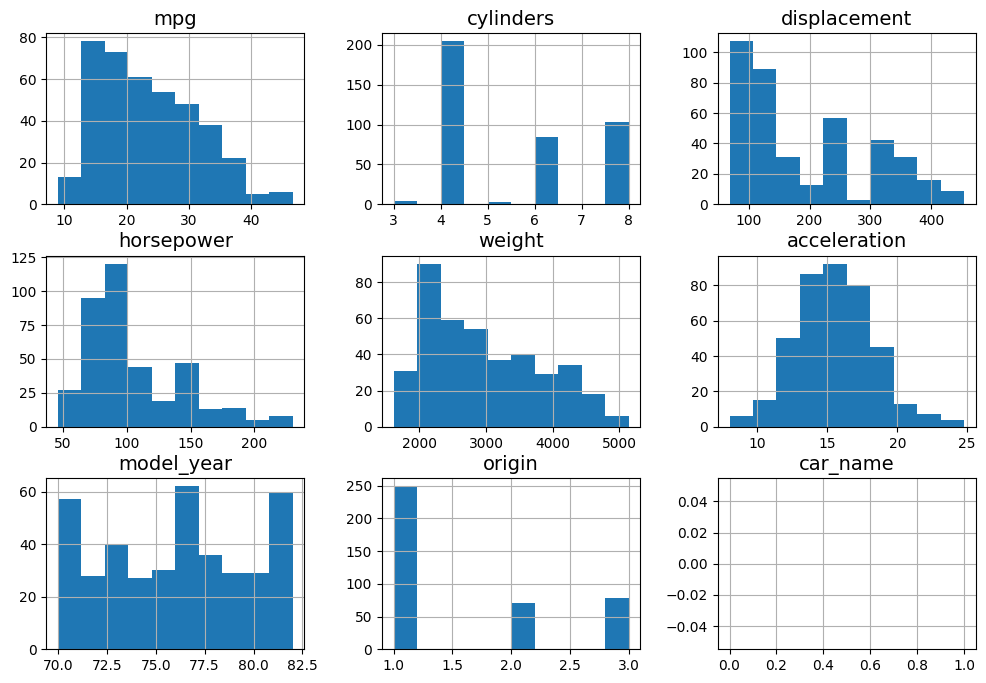

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=10, figsize=(12, 8))
plt.show()

### 📊 Key Insights from Feature Distributions

- **mpg**: Right-skewed — most cars are not fuel-efficient.
- **cylinders**: Discrete (4, 6, 8) — treat as categorical.
- **displacement & weight**: Right-skewed — may need log transformation.
- **horsepower**: Skewed + has missing values — requires imputation.
- **acceleration**: Symmetric — no transformation needed.
- **model_year**: Covers 1970–1982 — can engineer `car_age`.
- **origin**: 3 categories (USA, Europe, Japan) — one-hot encode.
- **car_name**: Text — drop or extract brand if needed.

📌 Next: clean data, encode categories, handle skew, and impute missing values.
²

In [ ]:
data.corr(numeric_only=True)["mpg"].sort_values(ascending=False)
#median house value biggest correlation => the distribution of the median income schould be the same in both datasets

,mpg
mpg,1.000000
model_year,0.579267
origin,0.563450
acceleration,0.420289
cylinders,-0.775396
horsepower,-0.778427
displacement,-0.804203
weight,-0.831741
car_name,NaN


In [ ]:
import numpy as np

data["mpg_cat"] = pd.cut(data["mpg"],
                         bins=[0, 15, 20, 25, 30, np.inf],
                         labels=[1, 2, 3, 4, 5])


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(data, data["mpg_cat"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]


In [ ]:
test_set["horsepower"].isnull().sum()
#no nan in the test_set

np.int64(3)

In [ ]:
for set_ in (train_set, test_set):
    set_.drop("mpg_cat", axis=1, inplace=True)


#visualising data insights

In [ ]:
cars = train_set.copy()

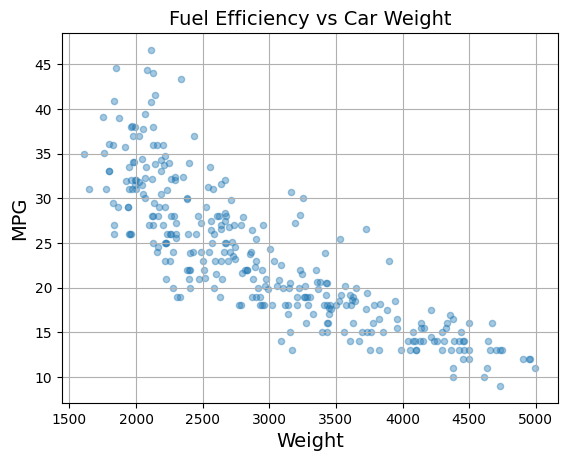

In [ ]:
cars.plot(kind="scatter", x="weight", y="mpg", alpha=0.4, grid=True)
plt.title("Fuel Efficiency vs Car Weight")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()
#linear path


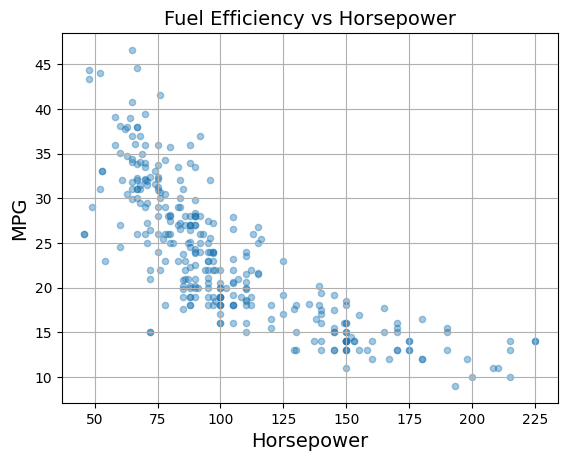

In [ ]:
cars.plot(kind="scatter", x="horsepower", y="mpg", alpha=0.4, grid=True)
plt.title("Fuel Efficiency vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()
#same here what does that suggest

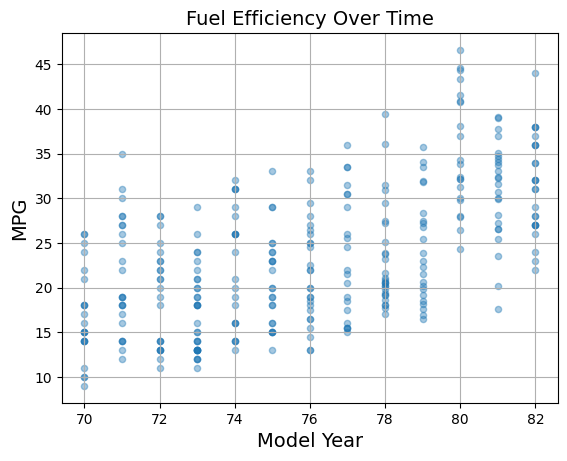

In [ ]:
cars.plot(kind="scatter", x="model_year", y="mpg", alpha=0.4, grid=True)
plt.title("Fuel Efficiency Over Time")
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()


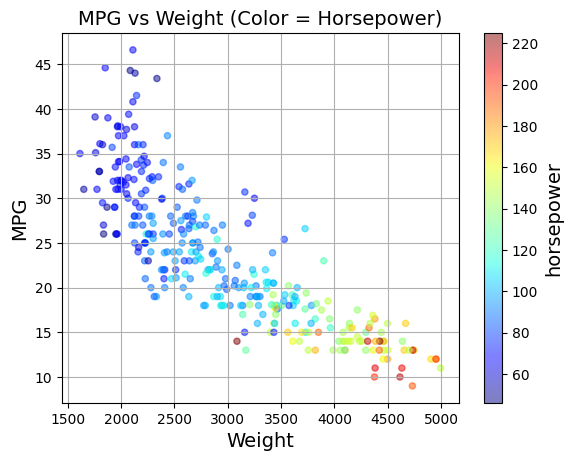

In [ ]:
cars.plot(kind="scatter", x="weight", y="mpg", alpha=0.5,
          c="horsepower", cmap="jet", colorbar=True, grid=True)
plt.title("MPG vs Weight (Color = Horsepower)")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()


# Looking for correlations

In [ ]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["mpg"].sort_values(ascending=False)
#STRONG CORRELATION  between median_income  and median_house_value


,mpg
mpg,1.000000
model_year,0.593894
origin,0.591190
acceleration,0.422811
cylinders,-0.781474
horsepower,-0.785784
displacement,-0.815336
weight,-0.837695
car_name,NaN


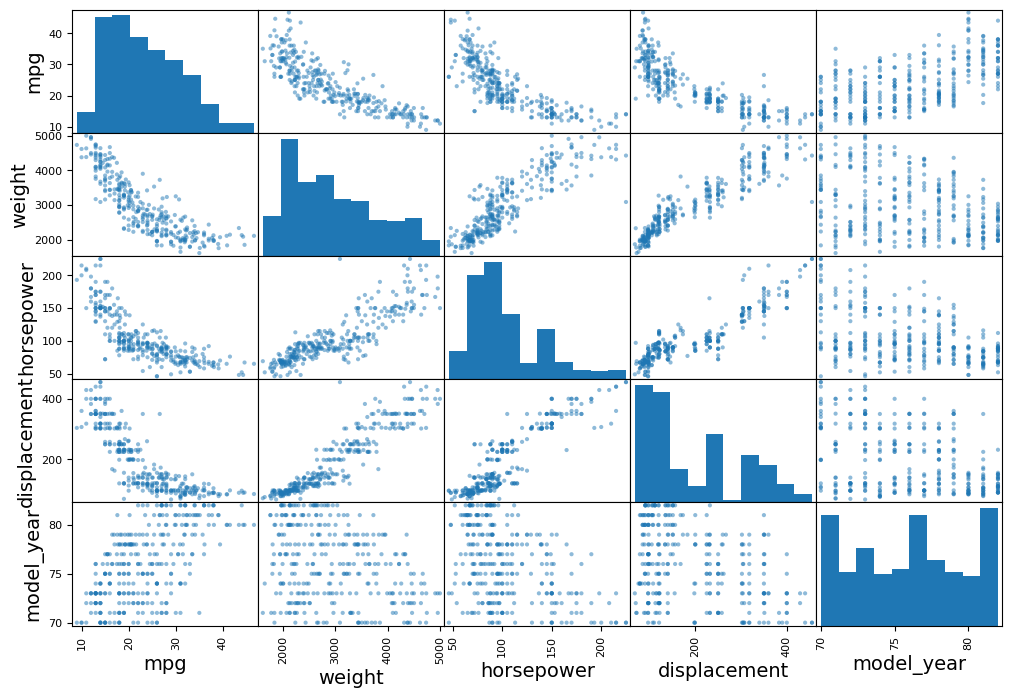

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["mpg", "weight", "horsepower", "displacement", "model_year"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()


# 🧠 Feature Engineering Summary

We created new features to better express real-world automotive relationships:

- **power_to_weight**: ratio of horsepower to weight — indicates efficiency under load.
- **displacement_per_cylinder**: helps estimate engine size per cylinder, normalizing for cylinder count.
- **car_age**: replaces model year with a more meaningful and linear feature.
- **is_v8_or_more**: binary indicator for big engines (V8 and above), which often consume more fuel.

These engineered features help capture **non-obvious relationships** and provide models with **more informative inputs** than raw features alone.


power_to_metric is to use in energetic dataset prediction
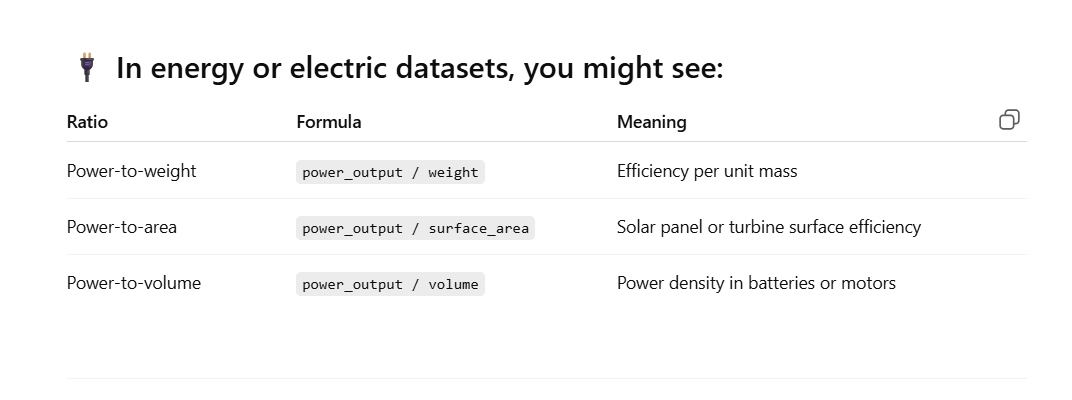

In [ ]:
# Feature 1: Power-to-weight ratio

train_set["power_to_weight"] = train_set["horsepower"] / train_set["weight"]

# Feature 2: Displacement per cylinder
train_set["displacement_per_cylinder"] = train_set["displacement"] / train_set["cylinders"]

# Feature 3: Car age (from model_year, assuming dataset ends in 1982 and current year is 2025)
train_set["car_age"] = 2025 - (1900 + train_set["model_year"])

# Feature 4: Binary flag for V8 or more
train_set["is_v8_or_more"] = (train_set["cylinders"] >= 8).astype(int)


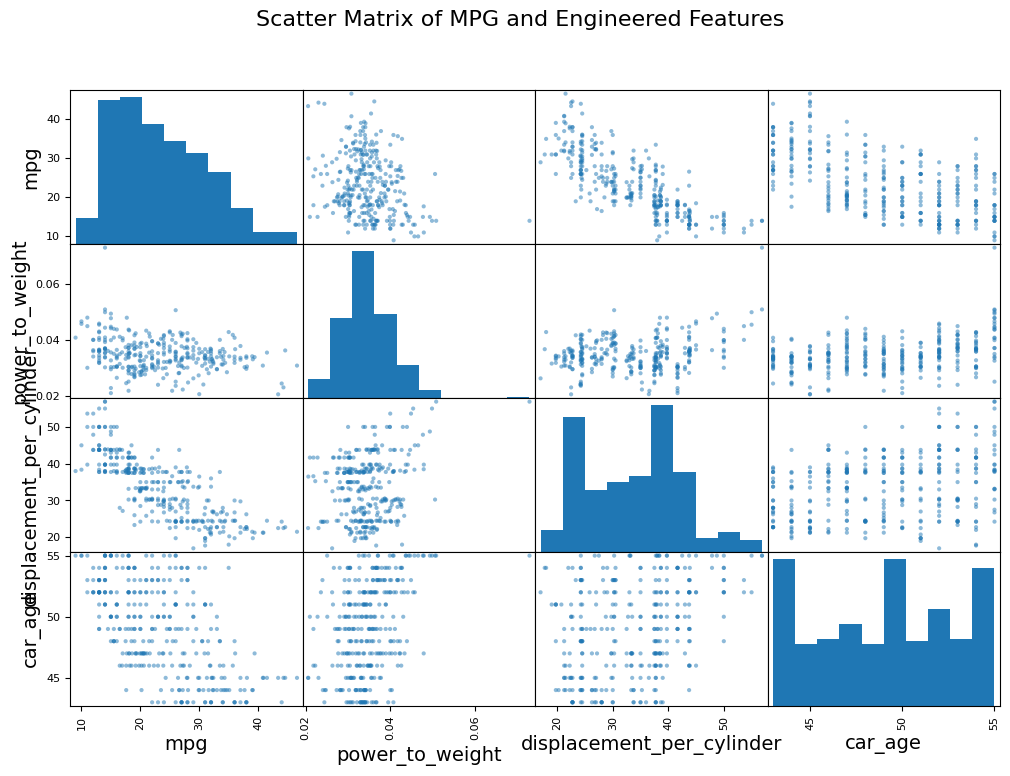

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Choose target + engineered features
attributes = ["mpg", "power_to_weight", "displacement_per_cylinder", "car_age"]

# Plot scatter matrix
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.suptitle("Scatter Matrix of MPG and Engineered Features", fontsize=16)
plt.show()


spotted outliers:

Some old cars (high car_age) still have high MPG

These are probably small Japanese or European cars from the late 70s or early 80s



In [ ]:
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["mpg"].sort_values(ascending=False)


,mpg
mpg,1.000000
model_year,0.593894
origin,0.591190
acceleration,0.422811
power_to_weight,-0.252464
car_age,-0.593894
is_v8_or_more,-0.639024
cylinders,-0.781474
horsepower,-0.785784
displacement_per_cylinder,-0.793862


# Prepare the data for machine learning algorithms

In [ ]:
features = train_set.drop("mpg", axis=1)
labels = train_set["mpg"].copy()


In [ ]:
#code to see the rows where we have at least whan NAN value
null_rows_idx = features.isnull().any(axis=1)
features.loc[null_rows_idx].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,power_to_weight,displacement_per_cylinder,car_age,is_v8_or_more
358,4,120.0,74.0,2635.0,18.3,81,3,NaN,0.028083,30.00,44,0
348,4,89.0,62.0,2050.0,17.3,81,3,NaN,0.030244,22.25,44,0
234,4,151.0,88.0,2740.0,16.0,77,1,NaN,0.032117,37.75,48,0
337,4,107.0,72.0,2290.0,17.0,80,3,NaN,0.031441,26.75,45,0
299,4,141.0,71.0,3190.0,24.8,79,2,NaN,0.022257,35.25,46,0


In [ ]:
features = features.drop("car_name", axis=1)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Separate numerical and categorical features
num_features = features.select_dtypes(include=["number"]).columns
cat_features = features.select_dtypes(include=["object"]).columns

# Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine everything
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Apply to training features
train_prepared = full_pipeline.fit_transform(features)


In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def column_ratio(X):
    X = np.asarray(X)
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]


In [ ]:
from sklearn.pipeline import make_pipeline

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )


In [ ]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)


In [210]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector


preprocessing = ColumnTransformer([

    ("power_to_weight", ratio_pipeline(), ["horsepower", "weight"]),
    ("displacement_per_cylinder", ratio_pipeline(), ["displacement", "cylinders"]),
    ("log", log_pipeline, ["horsepower", "weight", "displacement"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=num_pipeline)


In [ ]:
train_prepared = preprocessing.fit_transform(features)


In [ ]:
train_prepared

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.22820061e-01, -2.81751164e-01, -6.46185904e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.34862607e+00, -1.17944350e+00, -1.21608446e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.07887894e-01, -1.42025942e-01, -2.07994340e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.73078975e-01, -5.10089067e-01, -1.58136921e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.04246502e-02,  3.62277589e-01,  3.27926702e-01],
       [ 7.22061838e-22,  0.00000000e+00,  0.00000000e+00, ...,
        -7.43566861e-01, -1.01912602e+00, -1.03238704e+00]])

In [ ]:
import pandas as pd

pd.DataFrame(train_prepared).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,4.714393e-80,0.0,0.0,0.0,0.0,0.0,-1.120630,-0.412550,-0.822820,-0.281751,-0.646186
1,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.755822,-1.324060,-1.348626,-1.179444,-1.216084
2,0.0,0.0,0.0,0.0,4.156566e-251,0.0,0.0,0.0,0.0,0.0,-0.439566,0.498960,-0.307888,-0.142026,-0.207994
3,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-0.553672,-0.794796,-0.904245,-0.783554,-0.864841
4,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-2.104485,0.204925,-0.945809,0.401728,-0.338658


In [ ]:
preprocessing.get_feature_names_out()


array(['cluster_sim__Cluster 0 similarity',
       'cluster_sim__Cluster 1 similarity',
       'cluster_sim__Cluster 2 similarity',
       'cluster_sim__Cluster 3 similarity',
       'cluster_sim__Cluster 4 similarity',
       'cluster_sim__Cluster 5 similarity',
       'cluster_sim__Cluster 6 similarity',
       'cluster_sim__Cluster 7 similarity',
       'cluster_sim__Cluster 8 similarity',
       'cluster_sim__Cluster 9 similarity', 'power_to_weight__ratio',
       'displacement_per_cylinder__ratio', 'log__horsepower',
       'log__weight', 'log__displacement'], dtype=object)

# Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


full_model = make_pipeline(preprocessing, LinearRegression())

full_model.fit(features, labels)




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('cluster_sim',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clustersimilarity',
                                                                   ClusterSimilarity(gamma=0.1,
                                                                                     random_state=42))]),
                                                  <sklearn.compose._column_tran...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['horsepower', 'weight',
                                                   'displacement']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7904e8632f90>)])),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = full_model.predict(features)
rmse = mean_squared_error(labels, predictions)
print("Training RMSE:", rmse)


Training RMSE: 14.447630919024173


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

lin_scores = cross_val_score(full_model, features, labels,
                             scoring="neg_root_mean_squared_error", cv=10)
print("Linear Regression CV RMSE:", -lin_scores.mean())


Linear Regression CV RMSE: 41.886300354067075


In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
import numpy as np
param_distributions = {
    "randomforestregressor__n_estimators": randint(50,100 ),               # discrete, common
    "randomforestregressor__max_features": randint(2, 8),                  # small integer range
    "randomforestregressor__max_depth": randint(5, 30),                    # tree depth
    "randomforestregressor__min_samples_split": uniform(0.01, 0.2),        # continuous between 1% and 21%
    "randomforestregressor__min_samples_leaf": randint(1, 10),            # small discrete values
    "randomforestregressor__bootstrap": [True, False]                      # binary choice
}
rf_model = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

rnd_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring="neg_root_mean_squared_error",
    cv=5,
    random_state=42,
    n_jobs=-1,
)


rnd_search.fit(features, labels)

print("Best RMSE:", -rnd_search.best_score_)
print("Best params:", rnd_search.best_params_)

Best RMSE: 2.5008399020373435
Best params: {'randomforestregressor__bootstrap': True, 'randomforestregressor__max_depth': 13, 'randomforestregressor__max_features': 5, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': np.float64(0.029082023298082266), 'randomforestregressor__n_estimators': 72}


In [ ]:
test_set["power_to_weight"] = test_set["horsepower"] / test_set["weight"]
test_set["displacement_per_cylinder"] = test_set["displacement"] / test_set["cylinders"]
test_set["car_age"] = 2025 - (1900 + test_set["model_year"])
test_set["is_v8_or_more"] = (test_set["cylinders"] >= 8).astype(int)


In [212]:
X_test = test_set.drop("mpg", axis=1)
y_test = test_set["mpg"].copy()
final_model = rnd_search.best_estimator_

final_predictions = final_model.predict(X_test)


In [213]:
from sklearn.metrics import mean_squared_error
final_rmse = mean_squared_error(y_test, final_predictions)
print("✅ Final Test RMSE:", final_rmse)

✅ Final Test RMSE: 12.620743359694064
